In [1]:
from sklearn.utils.validation import check_is_fitted, check_X_y, check_array, column_or_1d

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt  
from sklearn.tree import  DecisionTreeRegressor, plot_tree  

 
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle 
from sklearn.model_selection import train_test_split
from sklearn.utils.validation import check_is_fitted
from sklearn.utils import check_random_state
import seaborn as sns
import warnings
from sklearn.exceptions import DataConversionWarning 

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

warnings.filterwarnings('ignore')

In [2]:
from randomboostingregressor import RandomBoostingRegressor

RandomBoostingRegressor:
MSE: 0.3122
R²: 0.7618

GradientBoostingRegressor:
MSE: 0.2940
R²: 0.7756


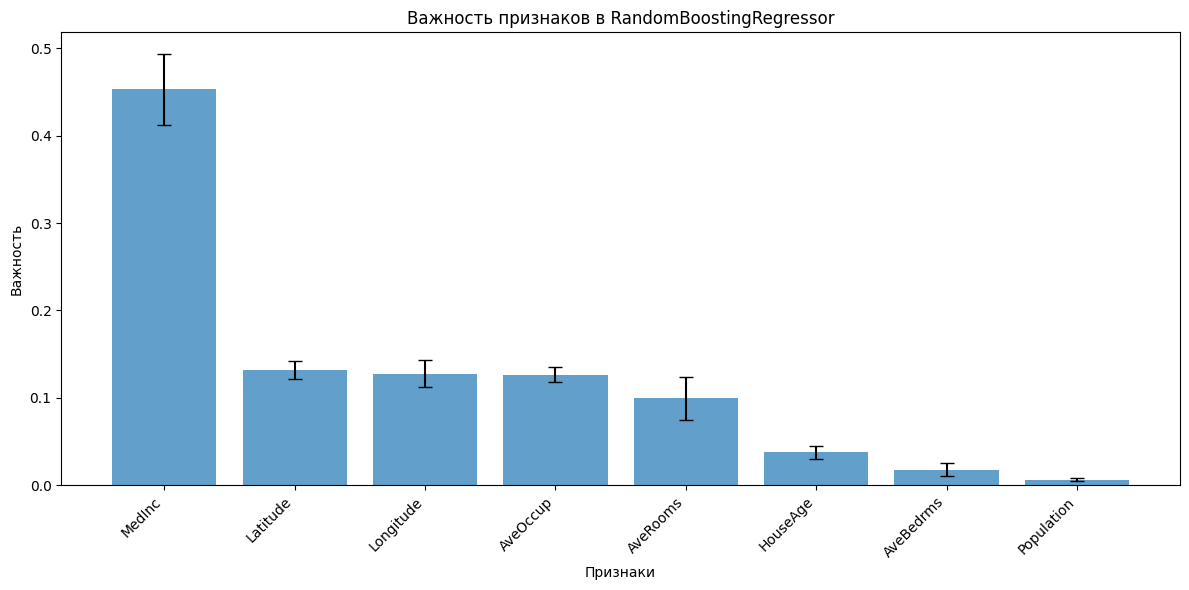

In [3]:
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Вырождение модели в случай одного дерева и сравнение с DecisionTreeRegressor

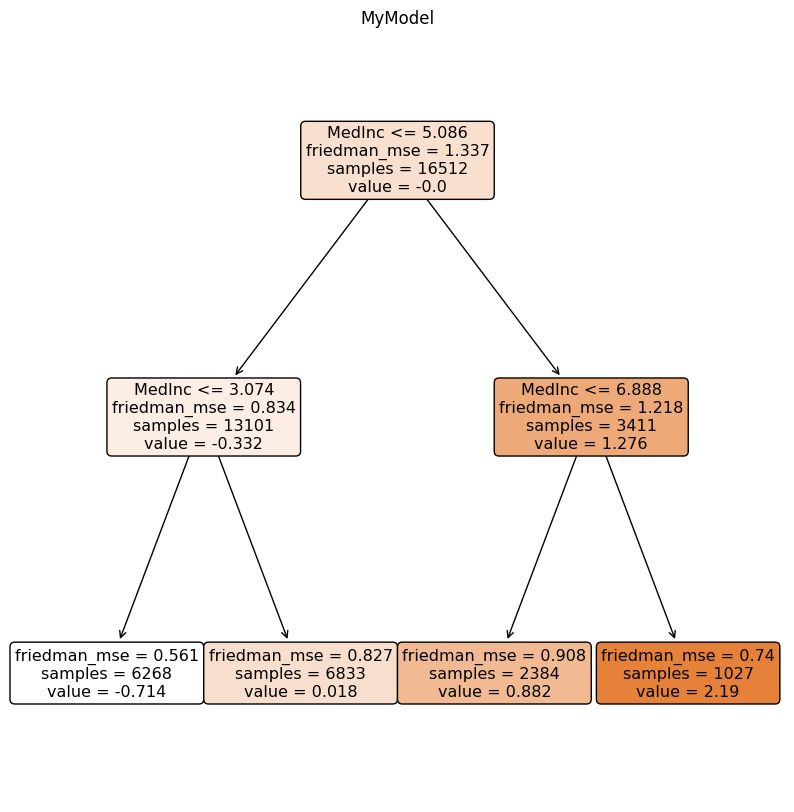

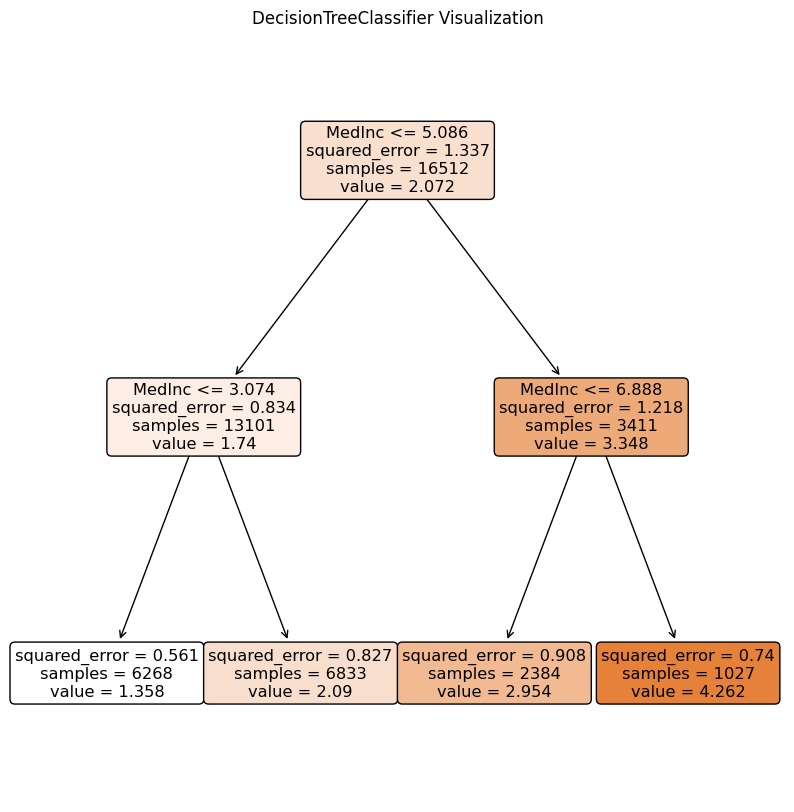

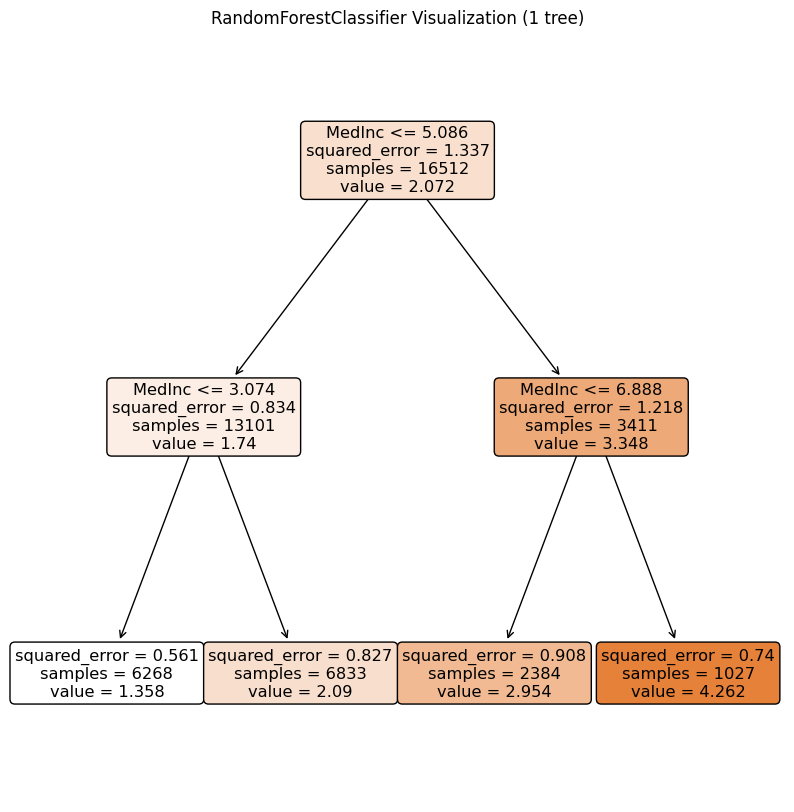

In [4]:
from sklearn.tree import DecisionTreeClassifier, plot_tree  

plt.figure(figsize=(10,10))
rbr = RandomBoostingRegressor( n_estimators  = 1 , gb_n_estimators = 1, learning_rate = 0.1, 
                              max_depth =  2, max_features =  1., random_state=69, bootstrap = False)  

rbr.fit(X_train, y_train)
selected_tree = rbr.estimators_[0].estimators_[0, 0] 
plot_tree(selected_tree, filled=True,feature_names=X_train.columns,  class_names=np.unique(y_train).astype(str), rounded=True) 
plt.title("MyModel")
plt.show()  


plt.figure(figsize=(10,10))
tree_clf = DecisionTreeRegressor(max_depth=2, max_features = 1., random_state=69) 
tree_clf.fit(X_train, y_train)
#tree_clf.fit(X_train_higgs.sample(frac=1, replace=True, random_state = 60), y_train_higgs.sample(frac=1, replace=True, random_state = 60))
plot_tree(tree_clf, filled=True, feature_names=X_train.columns, class_names= np.unique(y_train).astype(str), rounded=True) 
plt.title("DecisionTreeClassifier Visualization")
plt.show()   

plt.figure(figsize=(10,10))
rf = RandomForestRegressor(n_estimators = 1, max_depth=2, max_features = 1., bootstrap=False,  random_state=69)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
plot_tree(rf.estimators_[0], filled=True, feature_names=X_train.columns, class_names=np.unique(y_train).astype(str), rounded=True)
plt.title("RandomForestClassifier Visualization (1 tree)") 
plt.show()

# сравнение с RandomForestRegressor

In [5]:
rf_model = RandomForestRegressor(n_estimators = 30, max_depth = 3, max_features = 24, bootstrap=False,  random_state=69)
rf_model.fit(X_train, y_train)
print('rf_mean_squared_error: ', mean_squared_error(y_test, rf_model.predict(X_test)) ) 

rb = RandomBoostingRegressor( n_estimators = 30 , gb_n_estimators = 1, learning_rate=1., max_depth =  3, 
                              max_features =  24, bootstrap = False, n_jobs = 30, random_state=69) 
rb.fit(X_train, y_train)
print('mean_squared_error rb: ', mean_squared_error( y_test, rb.predict(X_test)) )

rf_mean_squared_error:  0.6424109810265641
mean_squared_error rb:  0.6424109810265639


# сравнение с GradientBoostingRegressor

In [6]:
gb_model = GradientBoostingRegressor(n_estimators = 30, max_depth = 3, max_features = 1.,learning_rate=1.,  random_state=69)
gb_model.fit(X_train, y_train)
print('mean_squared_error gb: ', mean_squared_error(y_test, gb_model.predict(X_test)) ) 

rb = RandomBoostingRegressor( n_estimators = 1 , gb_n_estimators = 30, learning_rate=1., max_depth =  3, 
                              max_features =  1., bootstrap = False, n_jobs = 30, random_state=69) 
rb.fit(X_train, y_train)
print('mean_squared_error rb: ', mean_squared_error( y_test, rb.predict(X_test)) )

mean_squared_error gb:  0.29439838980729405
mean_squared_error rb:  0.29439838980729405


# GridSearchCV

Fitting 3 folds for each of 192 candidates, totalling 576 fits
Лучшие параметры:
{'gb_n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 7, 'max_features': 0.5, 'n_estimators': 30}

Лучший MSE на кросс-валидации:
0.2211

Оценка лучшей модели на тестовых данных:
MSE: 0.2145
R²: 0.8363

Доступные параметры для pivot_table:
Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_gb_n_estimators', 'param_learning_rate', 'param_max_depth',
       'param_max_features', 'param_n_estimators', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'mean_test_MSE'],
      dtype='object')

Сводная таблица MSE:
param_max_features          0.2       0.5       0.7       1.0
param_gb_n_estimators                                        
10                     0.761670  0.572803  0.566098  0.554970
20                     0.548737  0.397398  0.395540  0.391613
50         

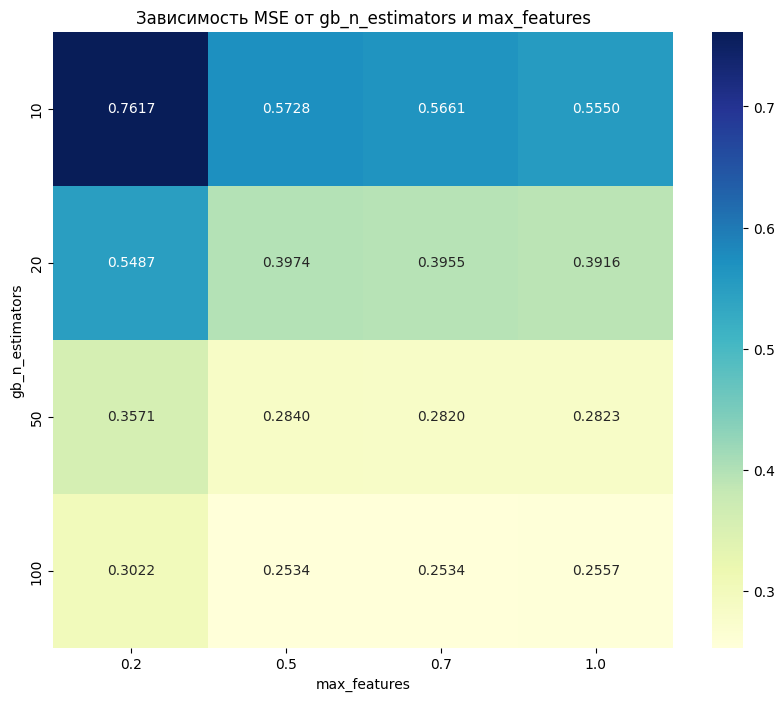

In [8]:
rb_regressor = RandomBoostingRegressor(random_state=42)

param_grid = {
    'max_features': [0.2, 0.5, 0.7, 1.0],
    'n_estimators': [1, 5, 10, 30],
    'gb_n_estimators': [10, 20, 50, 100],
    'learning_rate': [0.1],
    'max_depth': [3, 5, 7],
}

scoring = 'neg_mean_squared_error'
grid_search = GridSearchCV(
    estimator=rb_regressor,
    param_grid=param_grid,
    scoring=scoring,
    cv=3,
    n_jobs=-1,  
    verbose=2
)


grid_search.fit(X_train, y_train)
print("Лучшие параметры:")
print(grid_search.best_params_)

print("\nЛучший MSE на кросс-валидации:")
best_mse = -grid_search.best_score_
print(f"{best_mse:.4f}")


best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score

mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print("\nОценка лучшей модели на тестовых данных:")
print(f"MSE: {mse_test:.4f}")
print(f"R²: {r2_test:.4f}")

results = pd.DataFrame(grid_search.cv_results_)
results['mean_test_MSE'] = -results['mean_test_score']
print("\nДоступные параметры для pivot_table:")
print(results.columns)

pivot_table = results.pivot_table(
    values='mean_test_MSE',
    index='param_gb_n_estimators',       
    columns='param_max_features'         
)

print("\nСводная таблица MSE:")
print(pivot_table)
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt=".4f", cmap="YlGnBu")
plt.title("Зависимость MSE от gb_n_estimators и max_features")
plt.xlabel("max_features")
plt.ylabel("gb_n_estimators")
plt.show()

RandomBoostingRegressor:
MSE: 0.3130
R²: 0.7611

GradientBoostingRegressor:
MSE: 0.2940
R²: 0.7756


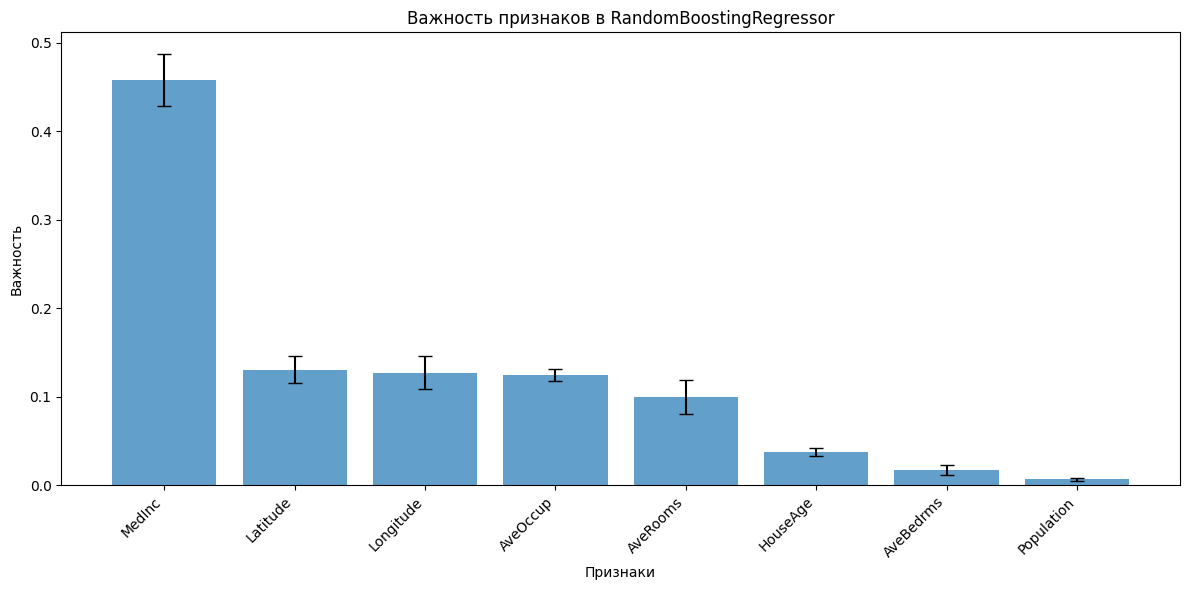

In [9]:
rb_regressor = RandomBoostingRegressor(
    n_estimators=10,
    gb_n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    max_features='sqrt',  
    n_jobs=30,
    random_state=42
)

rb_regressor.fit(X_train, y_train)


y_pred_rb = rb_regressor.predict(X_test)
mse_rb = mean_squared_error(y_test, y_pred_rb)
r2_rb = r2_score(y_test, y_pred_rb)
print("RandomBoostingRegressor:")
print(f"MSE: {mse_rb:.4f}")
print(f"R²: {r2_rb:.4f}")

from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)


mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)
print("\nGradientBoostingRegressor:")
print(f"MSE: {mse_gbr:.4f}")
print(f"R²: {r2_gbr:.4f}")


feature_importances = rb_regressor.feature_importances_
features = rb_regressor.feature_names_in_
variances = rb_regressor.feature_importances_var_


stds = np.sqrt(variances)
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = features[sorted_indices]
sorted_importances = feature_importances[sorted_indices]
sorted_stds = stds[sorted_indices]

plt.figure(figsize=(12, 6))
plt.bar(range(len(sorted_features)), sorted_importances, yerr=sorted_stds, capsize=5, align='center', alpha=0.7)
plt.xticks(range(len(sorted_features)), sorted_features, rotation=45, ha="right")
plt.xlabel('Признаки')
plt.ylabel('Важность')
plt.title('Важность признаков в RandomBoostingRegressor')
plt.tight_layout()
plt.show()